<a href="https://colab.research.google.com/github/kimchangwoo1011/2020--2-AI/blob/master/code/14w_%ED%8C%A8%EC%85%98_n%3Dmnist_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
title: "Tensorflow 2.0 Tutorial ch6.3 - Fashion MNIST with CNN 실습" date: 2020-04-21T10:08:30+09:00 tags:

"Deep Learning"
"Python"
"Google Colab"
"Tensorflow 2.0"
"Binary Classification"
"Classification"
"컨볼루션 신경망"
"Convolutional Neural Network"
"CNN"
"텐서플로 2.0"
"텐서플로 2.0 튜토리얼"
"Tensorflow 2.0 Tutorial" categories:
"Deep Learning"
"딥러닝"
"텐서플로 2.0"
"Python"
"Tensorflow 2.0"
"텐서플로 2.0 튜토리얼"
"Tensorflow 2.0 Tutorial" menu: python: name: Tensorflow 2.0 Tutorial ch6.3 - Fashion MNIST with CNN 실습

공지
본 Tutorial은 교재 시작하세요 텐서플로 2.0 프로그래밍의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다.

강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다.



본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다.

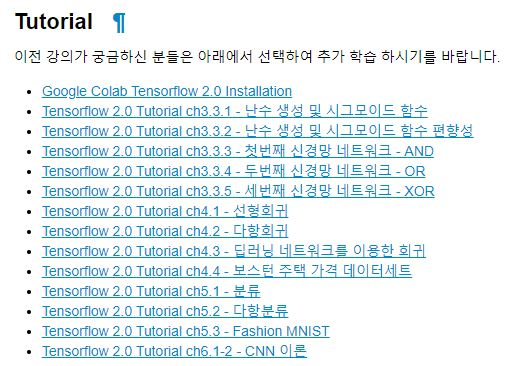

In [ ]:
I. 개요
이번 장은 앞에서 이론만 설명했기 때문에 이번에는 실습 위주로 진행합니다. 컨볼루션 레이어와 풀링 레이어, 
드롭아웃을 사용해서 분류 문제를 푸는데 어떻게 해야 성능이 개선 되는지 알아봅니다.

In [ ]:
II. 데이터 불러오기 및 정규화
5장에서 배운 내용을 근거로 데이터를 불러오고 정규화를 진행합니다.

In [1]:

import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


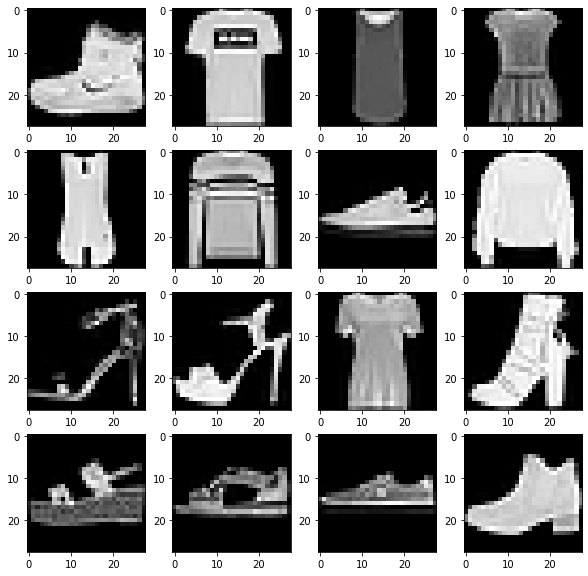

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [3]:
import matplotlib.pyplot as plt

# 전체 그래프의 크기를 width = 10, height = 10으로 지정합니다. 
plt.figure(figsize=(10, 10))
for c in range(16): 
  # 4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채우게 됩니다. 
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')

plt.show()

# 훈련 데이터이 1~16번째 까지의 라벨 프린트합니다. 
print(train_Y[:16])

III. 딥러닝 모델 생성¶
(1) 컨볼루션 신경망 모델 정의
컨볼루션 신경망 모델 정의는 풀링 레이어 또는 드롭아웃 없이 정의된 모델을 말합니다.

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32), 
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(units=128, activation='relu'), 
    tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

Conv2D의 인수에 대해 정리하도록 합니다.

kernel_size: 필터 행렬의 크기를 말하며, 수용 영역(receptive filed)이라고 불리워집니다. 앞의 숫자는 높이, 뒤의 숫자는 너비이고, 숫자를 하나만 쓸 경우 높이와 너비를 동일한 값으로 사용한다는 뜻입니다.1
filters: 필터의 개수를 의미하며, 네트워크가 깊어질수록 2배씩 늘려나갑니다.


In [7]:
nvidia-smi

NameError: ignored


위 명령어는 현재 구글 코랩에서 지원하는 GPU의 성능입니다. Tesla K80을 사용하고 있습니다.

구글 코랩에서는 무료로 GPU를 사용할 수 있도록 도와줍니다. 하드웨어 가속기를 사용하려면 [메뉴]-[런타임]-[런타임 유형 변경]-[하드웨어 가속기]-[GPU]로 지정하면 됩니다.

(2) 컨볼루션 신경망 모델 학습
신경망 모형을 학습하는데, 시간이 조금 소요되니 참고바란다. (약 10분)

In [6]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 148s 105ms/step - loss: 0.4696 - accuracy: 0.8330 - val_loss: 0.3716 - val_accuracy: 0.8678
Epoch 2/10
1407/1407 [==============================] - 147s 105ms/step - loss: 0.3430 - accuracy: 0.8740 - val_loss: 0.3675 - val_accuracy: 0.8707
Epoch 3/10
1407/1407 [==============================] - 154s 109ms/step - loss: 0.2925 - accuracy: 0.8927 - val_loss: 0.3779 - val_accuracy: 0.8690
Epoch 4/10
1407/1407 [==============================] - 148s 105ms/step - loss: 0.2512 - accuracy: 0.9059 - val_loss: 0.3836 - val_accuracy: 0.8713
Epoch 5/10
1407/1407 [==============================] - 148s 105ms/step - loss: 0.2192 - accuracy: 0.9192 - val_loss: 0.4108 - val_accuracy: 0.8671
Epoch 6/10
1407/1407 [==============================] - 147s 105ms/step - loss: 0.1929 - accuracy: 0.9275 - val_loss: 0.4631 - val_accuracy: 0.8640
Epoch 7/10
1407/1407 [==============================] - 148s 105ms/step - loss: 0.1704 - accuracy: 0.9366 - val_


이렇게 생성된 모형은 시각화로 다시 확인한다.

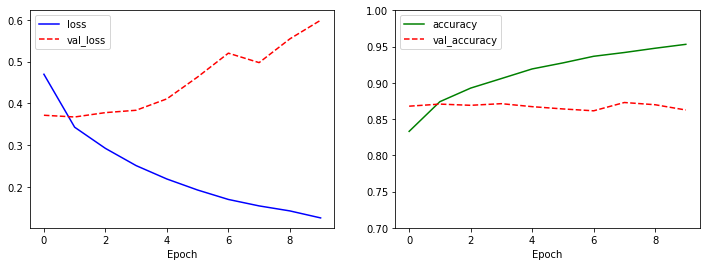

[0.6290597915649414, 0.8574000000953674]

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [9]:

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=128, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [10]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 45s 32ms/step - loss: 0.5149 - accuracy: 0.8141 - val_loss: 0.3614 - val_accuracy: 0.8655
Epoch 2/10
1407/1407 [==============================] - 44s 31ms/step - loss: 0.3583 - accuracy: 0.8703 - val_loss: 0.3380 - val_accuracy: 0.8764
Epoch 3/10
1407/1407 [==============================] - 44s 31ms/step - loss: 0.3156 - accuracy: 0.8849 - val_loss: 0.3140 - val_accuracy: 0.8860
Epoch 4/10
1407/1407 [==============================] - 44s 32ms/step - loss: 0.2891 - accuracy: 0.8952 - val_loss: 0.3044 - val_accuracy: 0.8889
Epoch 5/10
1407/1407 [==============================] - 45s 32ms/step - loss: 0.2695 - accuracy: 0.9012 - val_loss: 0.3121 - val_accuracy: 0.8903
Epoch 6/10
1407/1407 [==============================] - 45s 32ms/step - loss: 0.2539 - accuracy: 0.9082 - val_loss: 0.2910 - val_accuracy: 0.8960
Epoch 7/10
1407/1407 [==============================] - 45s 32ms/step - loss: 0.2356 - accuracy: 0.9128 - val_loss: 0.2962 -

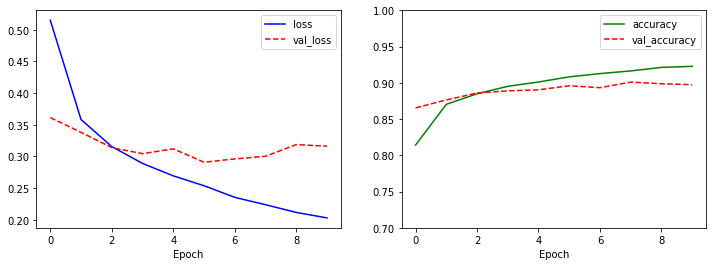

[0.32798710465431213, 0.8974999785423279]

In [11]:
# history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

IV. 연습 파일
구글 Colab에서 직접 연습해보자
V. Reference
김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.



In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(rate=0.5), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),    
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),  
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=512, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')                           
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

In [14]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
 433/1407 [========>.....................] - ETA: 4:54 - loss: 0.2793 - accuracy: 0.8994

KeyboardInterrupt: ignored

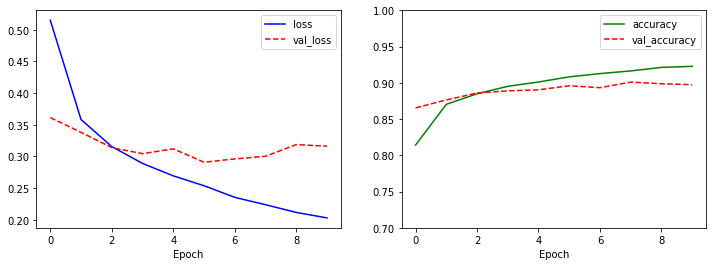

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)